# Create maps showing proportion of population over 65 years old, for each IVT unit catchment

Using the datafile as created from notebook 02_combine_demographic_data.ipynb, create a map of proportion of population over 65 within each IVT unit catchment.

To help with geopandas use https://github.com/MichaelAllen1966/2010_geopandas/blob/main/geopandas_1.ipynb

Import libraries

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import os
from matplotlib.transforms import Bbox
import matplotlib.colors as colors
import random
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

Read in Index of Multiple Deprivation data (per LSOA)

In [2]:
df_lsoa = pd.read_csv('./data/collated_data.csv')
#df_lsoa.set_index(['LSOA'], inplace=True)

Look at first few rows

In [3]:
df_lsoa.head()

,LSOA,admissions,closest_ivt_unit,closest_ivt_unit_time,closest_mt_unit,closest_mt_unit_time,mt_transfer_time,ivt_rate,Local Authority District name (2019),Income Domain Score,...,age band males 50,age band males 55,age band males 60,age band males 65,age band males 70,age band males 75,age band males 80,age band males 85,age band males 90,age band males 95
0,Welwyn Hatfield 010F,0.666667,SG14AB,19.2,NW12BU,37.5,47.2,6.8,Welwyn Hatfield,0.104,...,53.0,62.0,37.0,32.0,27.0,30.0,15.0,4.0,3.0,0.0
1,Welwyn Hatfield 012A,4.000000,SG14AB,20.3,NW12BU,37.5,47.2,6.8,Welwyn Hatfield,0.176,...,58.0,63.0,43.0,36.0,25.0,14.0,15.0,9.0,7.0,0.0
2,Welwyn Hatfield 002F,2.000000,SG14AB,19.2,NW12BU,38.6,47.2,6.8,Welwyn Hatfield,0.037,...,43.0,50.0,51.0,21.0,31.0,8.0,5.0,8.0,5.0,0.0
3,Welwyn Hatfield 002E,0.666667,SG14AB,19.2,NW12BU,37.5,47.2,6.8,Welwyn Hatfield,0.066,...,42.0,63.0,33.0,20.0,15.0,18.0,18.0,5.0,1.0,0.0
4,Welwyn Hatfield 010A,3.333333,SG14AB,19.2,NW12BU,37.5,47.2,6.8,Welwyn Hatfield,0.113,...,56.0,54.0,37.0,32.0,28.0,21.0,12.0,9.0,2.0,0.0


Group data by "closest_ivt_unit" and calculate the proportion of population over 65 years old.

https://stackoverflow.com/questions/31521027/groupby-weighted-average-and-sum-in-pandas-dataframe

In [4]:
cols = ['All persons','age band 65','age band 70','age band 75','age band 80','age band 85','age band 90','age band 95']
ivt_catchment_ages = df_lsoa.groupby(['closest_ivt_unit'])[cols].sum()
cols = ['age band 65','age band 70','age band 75','age band 80','age band 85','age band 90','age band 95']
ivt_catchment_ages['age band over 65'] = ivt_catchment_ages[cols].sum(axis=1)
ivt_catchment_ages['proportion over 65'] = ivt_catchment_ages['age band over 65']/ivt_catchment_ages['All persons']
ivt_catchment_ages

,All persons,age band 65,age band 70,age band 75,age band 80,age band 85,age band 90,age band 95,age band over 65,proportion over 65
closest_ivt_unit,,,,,,,,,,
B152TH,946192.0,38906.0,35331.0,25674.0,20169.0,12833.0,7432.0,0.0,140345.0,0.148326
B714HJ,950166.0,40463.0,37670.0,28189.0,21420.0,13437.0,7180.0,0.0,148359.0,0.156140
BA13NG,481727.0,26918.0,26988.0,18199.0,13905.0,8639.0,5230.0,0.0,99879.0,0.207335
BA214AT,284415.0,19909.0,19982.0,13782.0,9811.0,6310.0,3952.0,0.0,73746.0,0.259290
BB23HH,491561.0,25905.0,24331.0,15810.0,11440.0,6689.0,3753.0,0.0,87928.0,0.178875
...,...,...,...,...,...,...,...,...,...,...
WD180HB,621302.0,28403.0,27634.0,19186.0,15588.0,10272.0,6118.0,0.0,107201.0,0.172542
WF14DG,597452.0,31825.0,30304.0,20105.0,14492.0,8265.0,4664.0,0.0,109655.0,0.183538
WR51DD,406174.0,25735.0,25629.0,17486.0,12737.0,8080.0,4867.0,0.0,94534.0,0.232743


Map the data.

Load IVT catchment shape file (created in notebook "03_create_ivt_catchment_shapefile_and_map.ipynb" by dissolving LSOA polygons that are in the same IVT unit catchment).

https://geopandas.org/aggregation_with_dissolve.html

The following will load the shape file of the catchments for the IVT units in England and Wales into a GeoPandas DataFrame. Note that we can set the crs (Coordinate Reference System) when loading a GeoPandas DataFrame. EPSG:27700 is the crs to use when geography is in BNG (British National Grid Eastings and Northings).

EPSG:27700 OSGB 1936 / British National Grid -- United Kingdom Ordnance Survey. Co-ordinates are in Eastings (X) and Northings (Y). EPSG:4326 WGS 84 -- WGS84 - World Geodetic System 1984. Co-ordinates are in Longitude (X) and Latitude (Y). EPSG:3857 - projection for displaying lat/long as a flat map

In [5]:
filename = "data/ivt_catchment.shp"
exist = os.path.exists(filename)

if exist:
    # Read in
    gdf_ivt_catchment = gpd.read_file(filename, crs='EPSG:27700')
else:
    print('Run "03_create_ivt_catchment_shapefile_and_map.ipynb" first')
gdf_ivt_catchment.head()

,closest_iv,LSOA11NM,LSOA11CD,LSOA11NMW,geometry
0,B152TH,Birmingham 067A,E01008881,Birmingham 067A,"MULTIPOLYGON (((416346.099 267790.717, 416204...."
1,B714HJ,Birmingham 037A,E01008899,Birmingham 037A,"MULTIPOLYGON (((417917.557 275983.465, 418024...."
2,BA13NG,Bath and North East Somerset 007A,E01014370,Bath and North East Somerset 007A,"MULTIPOLYGON (((391028.906 148190.250, 391138...."
3,BA214AT,East Devon 005A,E01019886,East Devon 005A,"MULTIPOLYGON (((325347.501 91556.700, 325347.5..."
4,BB23HH,Bolton 001B,E01004803,Bolton 001B,"POLYGON ((378922.528 421439.886, 378922.528 42..."


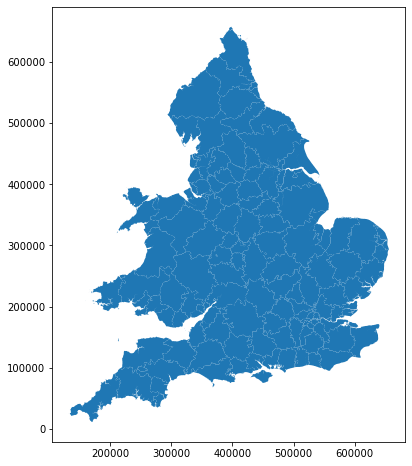

In [6]:
gdf_ivt_catchment.plot(figsize=(8,8));

#filename = 'zip://./data/Lower_Layer_Super_Output_Areas_December_2011_Full_Clipped__Boundaries_in_England_and_Wales.zip'
filename = 'zip://./data/Lower_layer_super_output_areas_(E+W)_2011_Boundaries_(Generalised_Clipped)_V2.zip'
gdf_lsoa = gpd.read_file(filename, crs='EPSG:27700')
gdf_lsoa.head()
gdf_lsoa.plot(figsize=(8,8));


Merging areas together
Now we are going to merge LSOAs that are in the same IVT unit catchment (we can merge on any column in order to combine areas). This will create a new DataFrame. To merge areas we use the dissolve() method.

https://geopandas.org/aggregation_with_dissolve.html

But first need to add a column to the geopandas dataframe. Using LSOA as the common value, bring in the field 'closest_ivt_unit'

Match lsoa_gdf['LSOA11NMW'] with lsoa_df['LSOA'] and add lsoa_df['closest_ivt_unit'] to lsoa_gdf['closest_ivt_unit'].
https://stackoverflow.com/questions/39816671/pandas-populate-new-dataframe-column-based-on-matching-columns-in-another-datafr
    
df_lsoa.set_index(['LSOA'], inplace=True)
gdf_lsoa.set_index(['LSOA11NMW'], inplace=True)

gdf_lsoa = gdf_lsoa.join(df_lsoa['closest_ivt_unit']).reset_index()
gdf_lsoa.head()
gdf_ivt_catchment = gdf_lsoa.dissolve(by='closest_ivt_unit')
gdf_ivt_catchment
gdf_ivt_catchment.plot(figsize=(8,8));

Add data about age, joining based on 'closest_ivt_unit'

In [7]:
gdf_ivt_catchment.set_index(['closest_iv'], inplace=True)
gdf_ivt_catchment = gdf_ivt_catchment.join(ivt_catchment_ages['proportion over 65']).reset_index()
gdf_ivt_catchment.head()

,closest_iv,LSOA11NM,LSOA11CD,LSOA11NMW,geometry,proportion over 65
0,B152TH,Birmingham 067A,E01008881,Birmingham 067A,"MULTIPOLYGON (((416346.099 267790.717, 416204....",0.148326
1,B714HJ,Birmingham 037A,E01008899,Birmingham 037A,"MULTIPOLYGON (((417917.557 275983.465, 418024....",0.156140
2,BA13NG,Bath and North East Somerset 007A,E01014370,Bath and North East Somerset 007A,"MULTIPOLYGON (((391028.906 148190.250, 391138....",0.207335
3,BA214AT,East Devon 005A,E01019886,East Devon 005A,"MULTIPOLYGON (((325347.501 91556.700, 325347.5...",0.259290
4,BB23HH,Bolton 001B,E01004803,Bolton 001B,"POLYGON ((378922.528 421439.886, 378922.528 42...",0.178875


Mapping data with MatPlotLib

Using MatPlotLib gives us more power than the GeoPandas DataFrame plot method.

Read in hospital data
(Stroke Team, SSNAP name, Easting, Northing)

In [8]:
gdf_units = gpd.read_file('./data/stroke_hospitals_2022.csv')

gdf_units["geometry"] = gpd.points_from_xy(
        gdf_units.Easting, gdf_units.Northing)
gdf_units = gdf_units.set_crs(epsg=27700)

# Restrict dataset to hospitals that deliver IVT
mask = gdf_units['Use_IVT']=="1"
gdf_units = gdf_units[mask]
gdf_units.head()

,Postcode,Hospital_name,Use_IVT,Use_MT,Country,Strategic Clinical Network,Health Board / Trust,Stroke Team,SSNAP name,Admissions 21/22,Thrombolysis,ivt_rate,Easting,Northing,Neuroscience,30 England Thrombectomy Example,hospital_city,Notes,geometry
0,RM70AG,RM70AG,1,1,England,London SCN,Barking; Havering and Redbridge University Hos...,"Queen's Hospital, Romford",Queens Hospital Romford HASU,981,117,11.9,551118,187780,1,0,Romford,,POINT (551118.000 187780.000)
1,E11BB,E11BB,1,1,England,London SCN,Barts Health NHS Trust,The Royal London Hospital,Royal London Hospital HASU,861,115,13.4,534829,181798,1,1,Royal London,,POINT (534829.000 181798.000)
2,SW66SX,SW66SX,1,1,England,London SCN,Imperial College Healthcare NHS Trust,"Charing Cross Hospital, London",Charing Cross Hospital HASU,1147,113,9.9,524226,176487,1,1,Charing Cross,,POINT (524226.000 176487.000)
3,SE59RW,SE59RW,1,1,England,London SCN,King's College Hospital NHS Foundation Trust,"King's College Hospital, London",King's College Hospital HASU,824,124,15,532536,176228,1,0,Kings College,,POINT (532536.000 176228.000)
4,BR68ND,BR68ND,1,0,England,London SCN,King's College Hospital NHS Foundation Trust,Princess Royal University Hospital; Orpington,Princess Royal University Hospital HASU,847,113,13.3,543443,165032,0,0,Princess Royal,,POINT (543443.000 165032.000)


In [9]:
# When using base maps convert data to epsg:3857
gdf_ivt_catchment = gdf_ivt_catchment.to_crs(epsg=3857)
gdf_units = gdf_units.to_crs(epsg=3857)

In [10]:
def add_nonoverlapping_text_labels(gdf_units, ax, col, y_step=0.05, fontsize=7):
    """
    #https://stackoverflow.com/questions/43916834/matplotlib-dynamically-change-text-position


    """

    text_rectangles = []

    # Better results if the labels are sorted descending in the y axis
    gdf_units['sort_by'] = gdf_units.geometry.y
    gdf_units.sort_values("sort_by", ascending=False, inplace=True)
    del gdf_units["sort_by"]

    # Add labels
    for x, y, label in zip(
        gdf_units.geometry.x, gdf_units.geometry.y, gdf_units[col]):
            text = ax.annotate(label, xy=(x, y), xytext=(8, 8), 
                        textcoords="offset points", fontsize=fontsize, 
                        bbox=dict(facecolor='w', alpha=0.3, edgecolor='none', boxstyle="round", pad=0.1))
            x, y = text.get_position()
            new_x = x - 2
            text.set_position((new_x, y))
                    
            rect = text.get_window_extent()

            for other_rect in text_rectangles:
                while Bbox.intersection(rect, other_rect):  # overlapping
                    x, y = text.get_position()
                    new_y = y - y_step
                    text.set_position((x, new_y))
                    rect = text.get_window_extent()
            text_rectangles.append(rect)
    return (ax)

In [12]:
eng_wales_bounds = gdf_ivt_catchment.bounds
eng_wales_bounds = eng_wales_bounds.merge(gdf_ivt_catchment['closest_iv'],how = 'left',
                      left_on = eng_wales_bounds.index,
                      right_on = gdf_ivt_catchment.index)
eng_wales_bounds = eng_wales_bounds.set_index('closest_iv')
eng_wales_bounds.drop('key_0', axis = 1, inplace = True)
eng_wales_bounds.head()

,minx,miny,maxx,maxy
closest_iv,,,,
B152TH,-228159.802962,6.840962e+06,-186486.338536,6.891316e+06
B714HJ,-229569.237502,6.866385e+06,-174024.968174,6.928042e+06
BA13NG,-301440.775912,6.639528e+06,-219298.476507,6.742989e+06
BA214AT,-343008.663893,6.568119e+06,-236217.122688,6.661788e+06
BB23HH,-294540.971643,7.097870e+06,-227656.460963,7.179456e+06


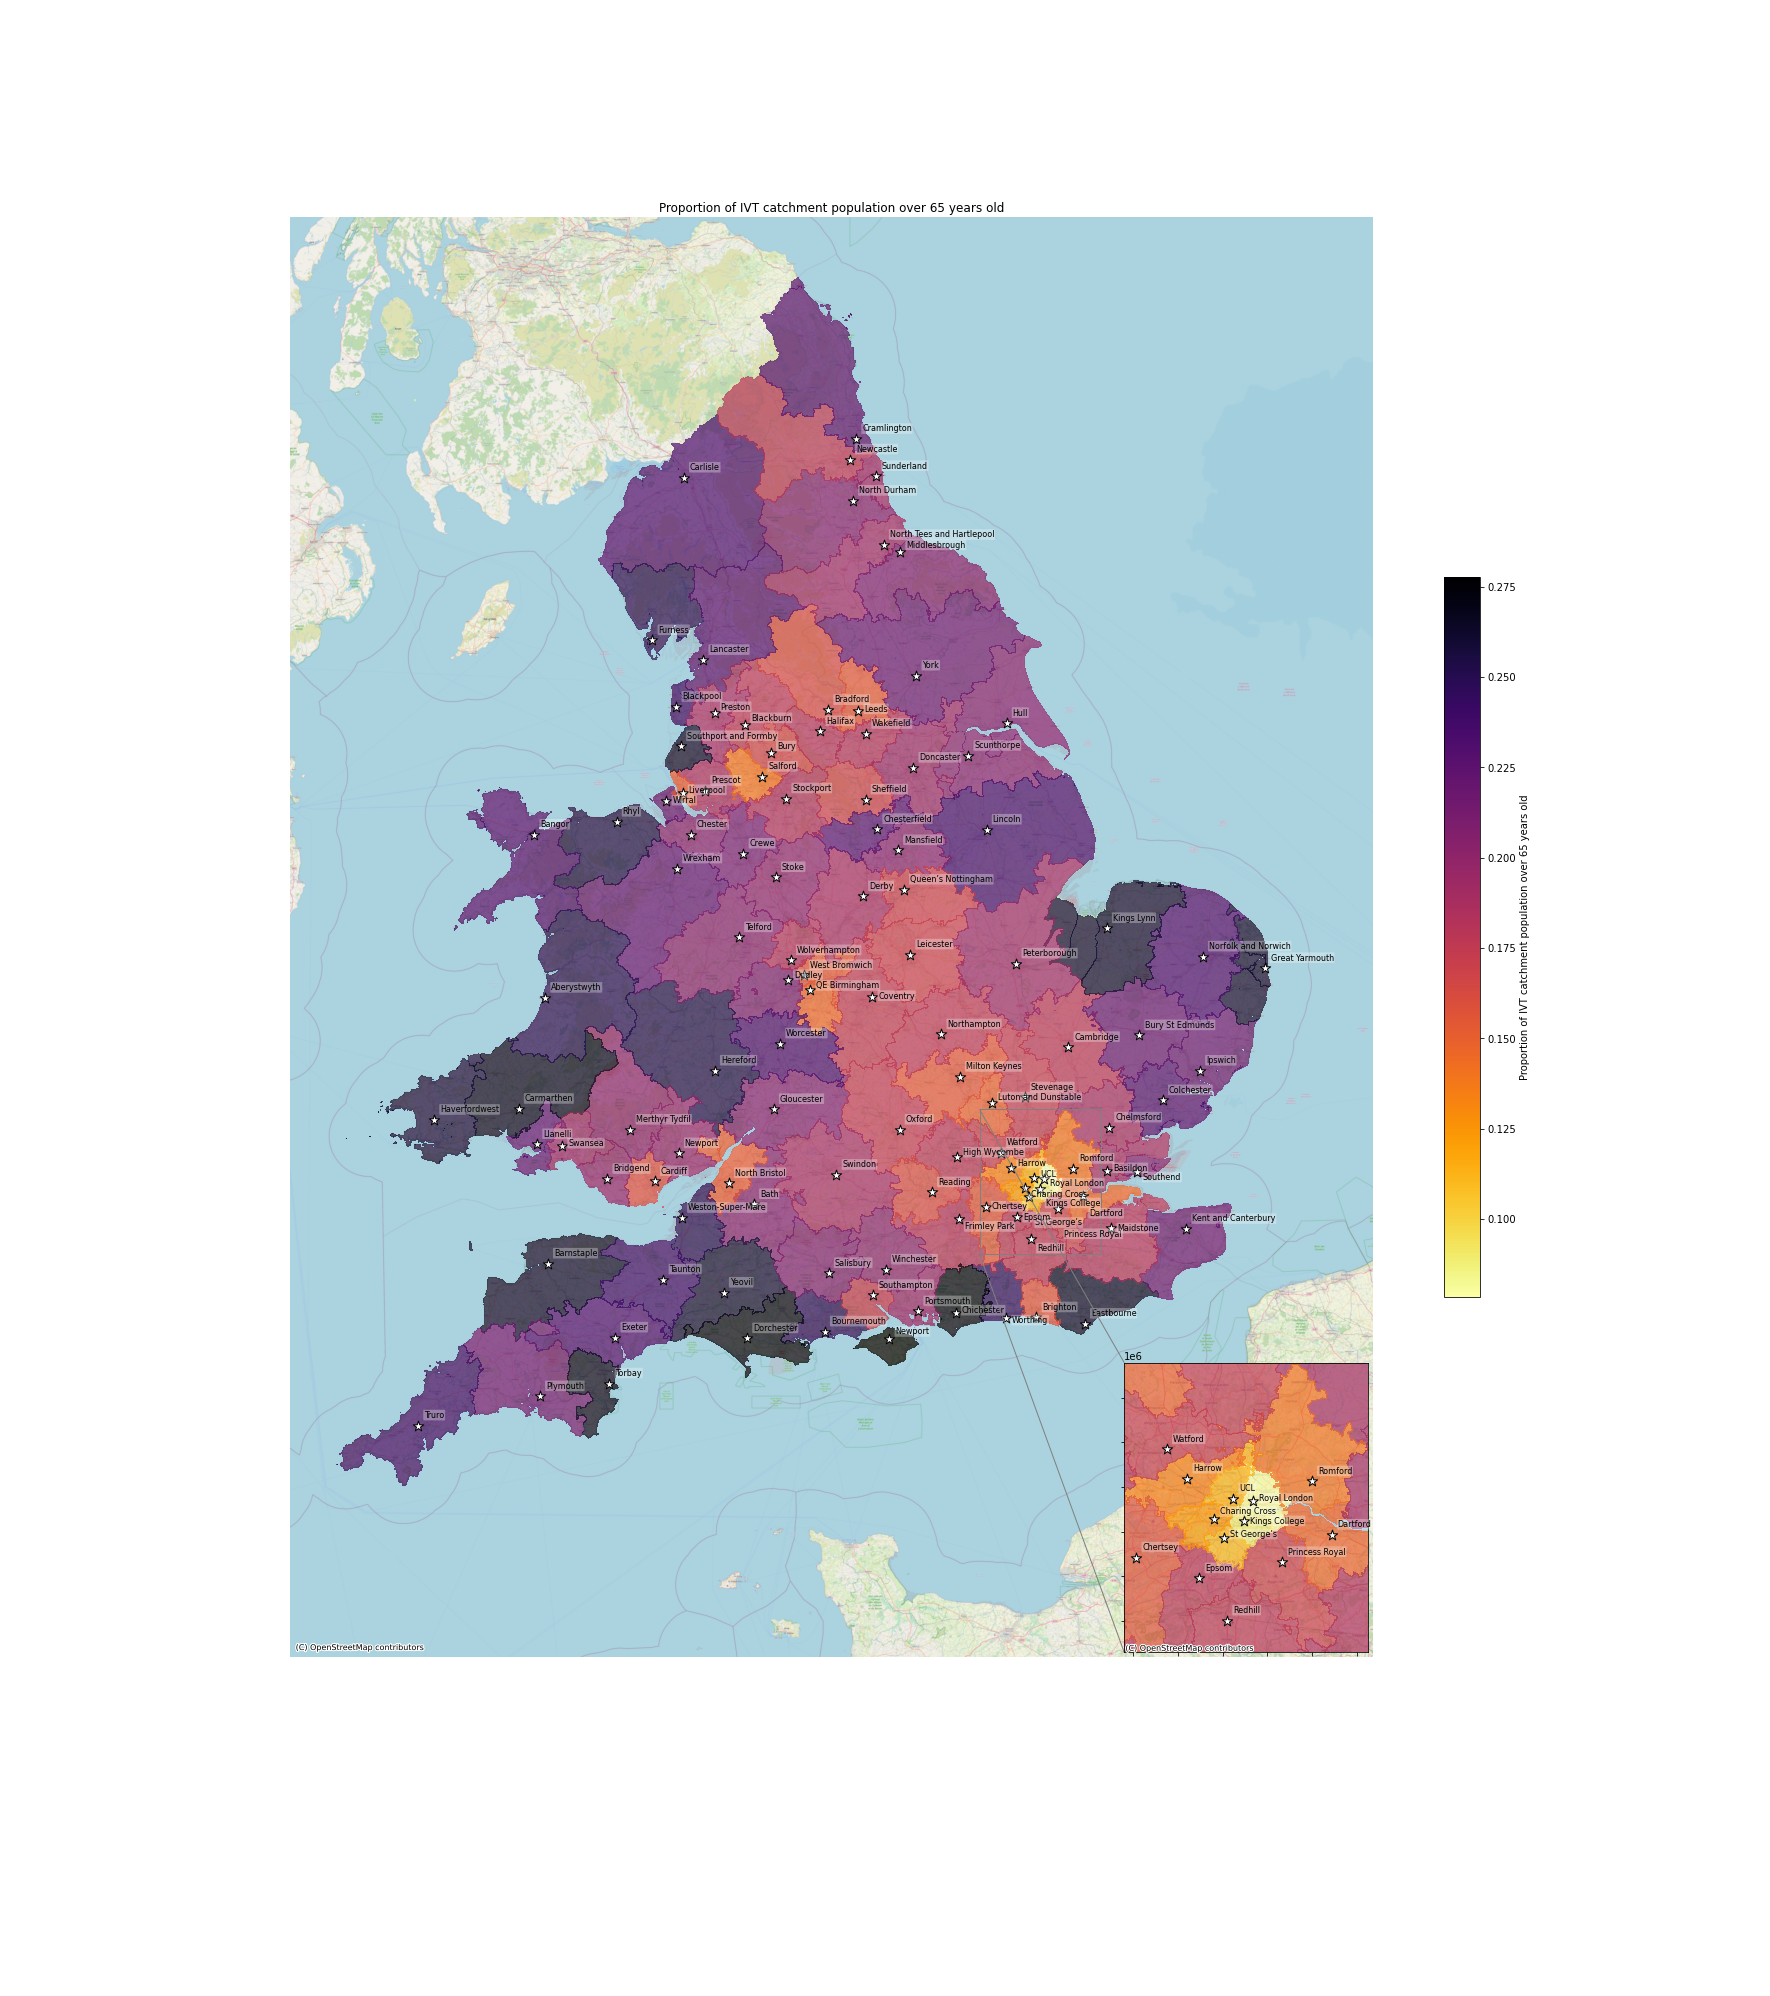

In [13]:
show_labels = True

col = 'proportion over 65'
col_readable = 'Proportion of IVT catchment population over 65 years old'

fig, ax = plt.subplots(figsize=(20, 20)) # Make max dimensions 10x10 inch
gdf_ivt_catchment.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
#                 vmin=0, # Manual scale min (remove to make automatic)
#                 vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)

# Plot location of hospitals
gdf_units.plot(ax=ax, edgecolor='k', facecolor='w', markersize=120, 
               marker='*')

if show_labels:
    ax = add_nonoverlapping_text_labels(gdf_units, ax, 'hospital_city',
                                        y_step=0.05, fontsize=8)

        
# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)


# give some more space at bottom for london inset map
ax.set_ylim(ax.get_ylim()[0] - 100000, ax.get_ylim()[1])
# give some more space at right for hospital name label
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 50000)

# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)

# Insert an inset map (loc=4 places it bottom right)
axins = zoomed_inset_axes(ax, 2, loc=4)

# Identify london hospitals to go in the inset map
mask = gdf_units["Strategic Clinical Network"]=="London SCN"
london_hospitals = gdf_units["Hospital_name"][mask].to_list()

# identify map area to plot in the inset map
# initialise exteme values
minx_ = np.inf
miny_ = np.inf
maxx_ = 0
maxy_ = 0
# Find min and max x and y for the london hospitals
for h in london_hospitals:
    minx,miny,maxx,maxy =  eng_wales_bounds.loc[h]
    minx_ = min(minx_, minx)
    miny_ = min(miny_, miny)
    maxx_ = max(maxx_, maxx)
    maxy_ = max(maxy_, maxy)

# Set extent of inset map
axins.set_xlim(minx_, maxx_)
axins.set_ylim(miny_, maxy_)

# Define lines connecting inset map to main map
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

# Plot zoom window
gdf_ivt_catchment.plot(ax=axins, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
#                 legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
#                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)

# Plot location of hospitals
gdf_units.plot(ax=axins, edgecolor='k', facecolor='w', markersize=120, 
               marker='*')

# Label hospitals
if show_labels:
    axins = add_nonoverlapping_text_labels(gdf_units, axins, 'hospital_city',
                                        y_step=0.05, fontsize=8)

# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax=axins, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)

# Remove x and y ticks
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax.set_axis_off() # Turn of axis line and numbers
ax.set_title(f'{col_readable}')
# Adjust for printing
ax.margins(0)
ax.apply_aspect()
plt.subplots_adjust(left=0.01, right=1.0, bottom=0.0, top=1.0)
plt.savefig(f'map_{col}.jpg', dpi=300) # Save figure
plt.show()